In [2]:
# 导入需要的模块
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 用来绘图的，封装了matplot
# 要注意的是一旦导入了seaborn，
# matplotlib的默认作图风格就会被覆盖成seaborn的格式
import seaborn as sns       

from scipy import stats
from scipy.stats import  norm
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline  
# 为了在jupyter notebook里作图，需要用到这个命令

In [3]:
data_train = pd.read_csv(r'C:\Users\20943\Desktop\我的坚果云\Sys_learning\2_\Input\DataSourse\train.csv')
data_train.head()
#data_train.columns

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
sns.distplot(data_train['SalePrice'])

In [ ]:
print("Skewness: %f" % data_train['SalePrice'].skew())
print("Kurtosis: %f" % data_train['SalePrice'].kurt())

'''
峰度：峰度（Kurtosis）是描述某变量所有取值分布形态陡缓程度的统计量。它是和正态分布相比较的。
Kurtosis=0 与正态分布的陡缓程度相同。
Kurtosis>0 比正态分布的高峰更加陡峭——尖顶峰
Kurtosis<0 比正态分布的高峰来得平台——平顶峰计算公式：β = M_4 /σ^4

偏度：偏度（Skewness）是描述某变量取值分布对称性的统计量。
Skewness=0 分布形态与正态分布偏度相同
Skewness>0 正偏差数值较大，为正偏或右偏。长尾巴拖在右边。
Skewness<0 负偏差数值较大，为负偏或左偏。长尾巴拖在左边。 计算公式： S= (X^ - M_0)/δ Skewness 越大，分布形态偏移程度越大。
'''

## 看不同的影响因素会对房价产生什么影响，是不是具有相关关系
- 一般用箱线图，也可以用点图
- 相关关系比较明显的，最后入选主要特征

var = 'CentralAir'
data = pd.concat([data_train['SalePrice'], data_train[var]], axis=1)
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

In [ ]:
var = 'OverallQual'
data = pd.concat([data_train['SalePrice'], data_train[var]], axis=1)
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

In [ ]:
var = 'YearBuilt'
data = pd.concat([data_train['SalePrice'], data_train[var]], axis=1)
f, ax = plt.subplots(figsize=(26, 12))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

In [ ]:
var = 'YearBuilt'
data = pd.concat([data_train['SalePrice'], data_train[var]], axis=1)
data.plot.scatter(x=var, y="SalePrice", ylim=(0, 800000))

In [ ]:
var  = 'GrLivArea'
data = pd.concat([data_train['SalePrice'], data_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0, 800000))

## 得到相关关系的分析矩阵

<AxesSubplot:>

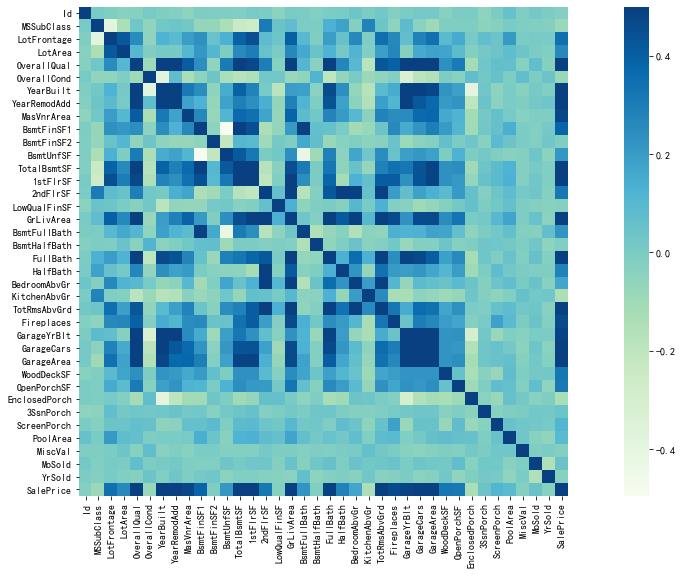

In [5]:
corrmat = data_train.corr()
f, ax = plt.subplots(figsize=(20, 9))
sns.heatmap(corrmat, vmax=0.5, square=True, cmap = 'GnBu')

In [ ]:
k  = 10 # 关系矩阵中将显示前10个更相关的特征，改成15就显示不出来了。。
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(data_train[cols].values.T)#这个转置是什么作用呢，我每次去掉电脑都会死机。。
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, 
                 square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [9]:
data_train[cols].values

array([[208500,      7,   1710, ...,      2,      8,   2003],
       [181500,      6,   1262, ...,      2,      6,   1976],
       [223500,      7,   1786, ...,      2,      6,   2001],
       ...,
       [266500,      7,   2340, ...,      2,      9,   1941],
       [142125,      5,   1078, ...,      1,      5,   1950],
       [147500,      5,   1256, ...,      1,      6,   1965]], dtype=int64)

<AxesSubplot:>

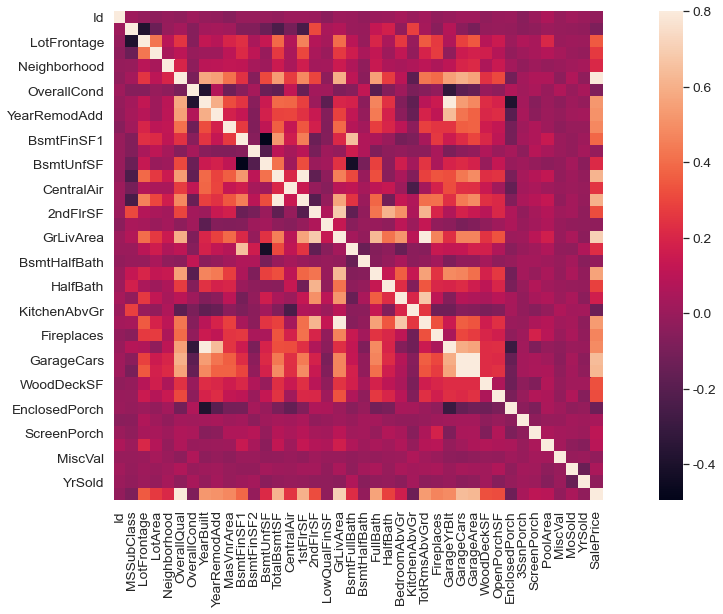

In [11]:
#把分类型变量也放入热度矩阵
from sklearn import preprocessing
f_names = ['CentralAir', 'Neighborhood']
for x in f_names:
    label = preprocessing.LabelEncoder()
    data_train[x] = label.fit_transform(data_train[x])
corrmat = data_train.corr()
f, ax = plt.subplots(figsize=(20, 9))
sns.heatmap(corrmat, vmax=0.8, square=True)

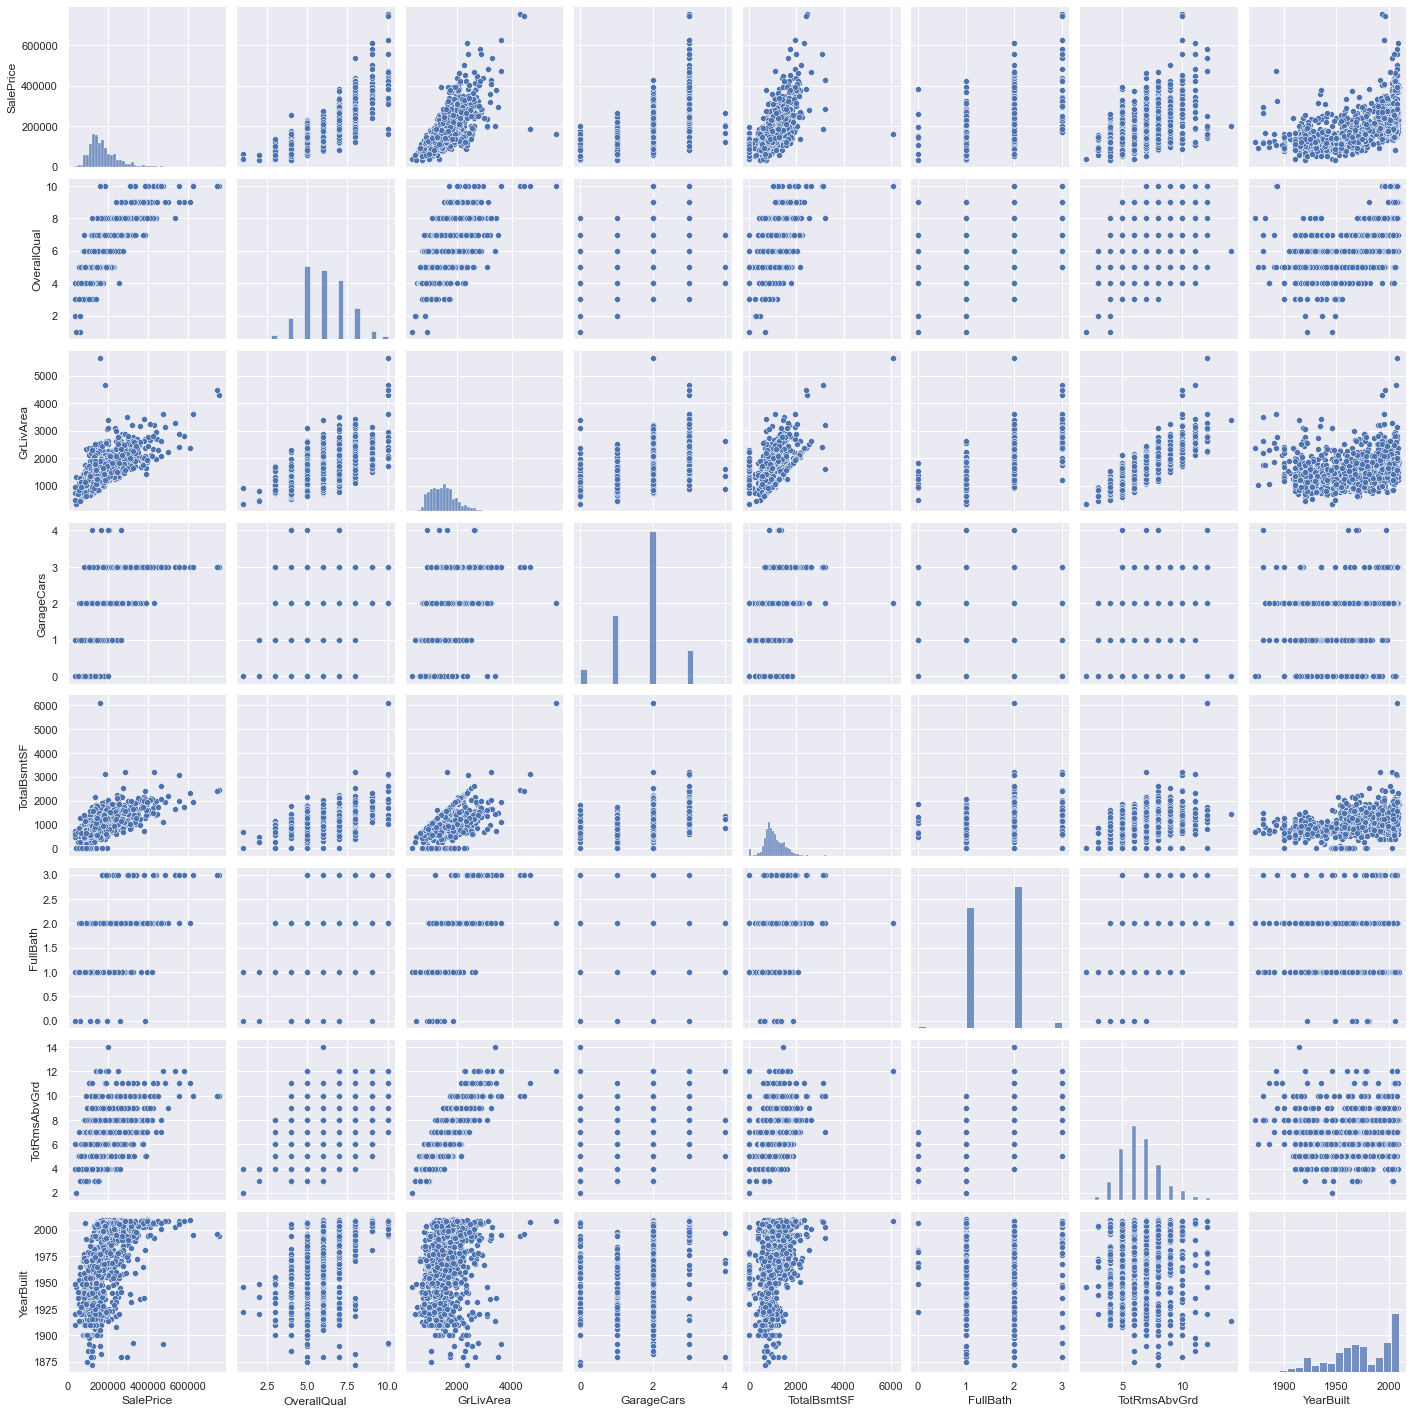

In [4]:
#绘制关系点图
sns.set()
cols = ['SalePrice','OverallQual','GrLivArea', 'GarageCars','TotalBsmtSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt']
sns.pairplot(data_train[cols], size = 2.5)
plt.show()

## 开始模拟数据

In [26]:
from sklearn import preprocessing
from sklearn import linear_model, svm, gaussian_process
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np

In [27]:
cols = ['OverallQual','GrLivArea', 'GarageCars','TotalBsmtSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt']
x = data_train[cols].values
y = data_train['SalePrice'].values
x_scaled = preprocessing.StandardScaler().fit_transform(x)
y_scaled = preprocessing.StandardScaler().fit_transform(y.reshape(-1,1)) #y要转化为列向量
X_train,X_test, y_train, y_test = train_test_split(x_scaled, y_scaled, test_size=0.33, random_state=42)

In [8]:
clfs = {
        'svm':svm.SVR(), 
        'RandomForestRegressor':RandomForestRegressor(n_estimators=400),
        'BayesianRidge':linear_model.BayesianRidge()
       }
for clf in clfs:
    try:
        clfs[clf].fit(X_train, y_train)
        y_pred = clfs[clf].predict(X_test)
        print(clf + " cost:" + str(np.sum(y_pred-y_test)/len(y_pred)) )
    except Exception as e:
        print(clf + " Error:")
        print(str(e))

svm cost:-18.002439870767606
RandomForestRegressor cost:-2.4789912759665786
BayesianRidge cost:-17.191504693239164


In [13]:
cols = ['OverallQual','GrLivArea', 'GarageCars','TotalBsmtSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt']
x = data_train[cols].values
y = data_train['SalePrice'].values
X_train,X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

clf = RandomForestRegressor(n_estimators=400)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
(y_pred.reshape(1,-1) - y_test.reshape(1,-1)).sum()

-307941.1673551585

In [14]:
sum(abs(y_pred - y_test))/len(y_pred)

19677.205871422815

## 检验测试集数据

In [16]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

# 之前训练的模型
rfr = clf

In [17]:
data_test = pd.read_csv(r'C:\Users\20943\Desktop\我的坚果云\Sys_learning\2_\Input\DataSourse\test.csv')

In [18]:
data_test[cols].isnull().sum()

OverallQual     0
GrLivArea       0
GarageCars      1
TotalBsmtSF     1
FullBath        0
TotRmsAbvGrd    0
YearBuilt       0
dtype: int64

In [19]:
cols2 = ['OverallQual','GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt']
cars = data_test['GarageCars'].fillna(np.mean(data_test['GarageCars']))
bsmt = data_test['TotalBsmtSF'].fillna(np.mean(data_test['TotalBsmtSF']))
data_test_x = pd.concat([data_test[cols2], cars, bsmt] ,axis=1)#axis = 1,按列加和，覆盖重复x = data_test_x.values

OverallQual     0
GrLivArea       0
FullBath        0
TotRmsAbvGrd    0
YearBuilt       0
GarageCars      0
TotalBsmtSF     0
dtype: int64

In [24]:
y_te_pred = rfr.predict(x)
print(y_te_pred)
print(y_te_pred.shape)
print(x.shape)
data_test_x.isnull().sum()

[196368.4375 175743.205  219098.445  ... 263587.8925 136623.5625
 149117.875 ]
(1460,)
(1460, 7)


OverallQual     0
GrLivArea       0
FullBath        0
TotRmsAbvGrd    0
YearBuilt       0
GarageCars      0
TotalBsmtSF     0
dtype: int64

In [25]:
prediction = pd.DataFrame(y_te_pred, columns=['SalePrice'])
result = pd.concat([ data_test['Id'], prediction], axis=1)
# result = result.drop(resultlt.columns[0], 1)
result.columns

Index(['Id', 'SalePrice'], dtype='object')

In [ ]:
result.to_csv('./Predictions.csv', index=False)